# TIME SERIES ANALYSIS

##### Important Terminology:

0. What is Time Series? and Time Series Components (Trend, Seasonality, cyclicity, irregular)
1. Time Series Creation - properties - Time index, lag, lead, difference of series - Concept of Forecasting?
2. Detrending, deseasonal the series
3. Time Series Decomposition
4. Concept of Stationarity - ADF Test
5. Auto correlation Function (ACF), Partial Auto correlation function (PACF)
6. Averages (Moving average, weighted moving average, centered moving average etc)
7. Smothening the Series
8. Time Series Modeling (ARIMA - Box Jenkins process)
9. Types of models (AR, MA, ARMA, ARIMA, ARIMAX, SARIMA, SARIMAX)
10. Advanced models (ARCH, GARCH, VAR, Wavelets etc)
11. Model accuracy metrics & validation (MAE, MSE, RMSE, MAPE etc)

### What is Time Series?

- A time series is a set of observations generated, sequentially in time, on a single variable
- Time periods are of equal length (days, weeks, months, quarters, annual)
- Time series analysis accounts for the fact that data points taken over time may have an internal structure (such as auto correlation, trend or seasonal variation) that should be accounted for
- Time series data is indexed by time and No missing values

> Time series data is ubiquitous, both within and outside of the data science field: weekly initial unemployment claims, tick level stock prices, weekly company sales, daily number of steps taken recorded by a wearable, just to name a few. Some of the most important and commonly used data science techniques to analyze time series data are those in developed in the field of statistics. For this reason, time series statistical models should be included in any data scientist's toolkit.

### What is Time Series ANalysis?
Time series analysis and modeling have many business and social applications. It is extensively used to forecast company sales, product demand, stock market trends, agricultural production etc.
The fundamental idea for time series analysis is to decompose the original time series (sales, stock market trends, etc.) into several independent components. Typically, business time series are divided into the following four components:

- Trend – overall direction of the series i.e. upwards, downwards etc.
- Seasonality – monthly or quarterly patterns
- Cycle – long-term business cycles, they usually come after 5 or 7 years
- Irregular remainder – random noise left after extraction of all the components

Interference of these components produces the final series.
Why bother decomposing the original / actual time series into components? It is much easier to forecast the individual regular patterns produced through decomposition of time series than the actual series.

### Time Series Analysis - Time Series Components

- Time Series data allows us to either to do analysis or forecasting.
- Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
- Time series forecasting is the use of a model to predict future values based on previously observed values.

##### Components: Time Series can be decomposed into 4 components
- Trend: Trend is the gradual, long-run (or secular) evolution of the variables that we are seeking to forecast.
- Seasonal Effects: Many series display a regular pattern of variability depending on the time of year. This pattern is known as the seasonal effect.
- Cyclic Component: Fluctuations around the trend, excluding the irregular component, revealing a succession of phases of expansion and contraction.
- Irregular Component (White Noise): The unexplained remaining variability.

## Creating Time Series

### Loading and Handling Time Series in Pandas
Pandas has dedicated libraries for handling TS objects, particularly the datatime64[ns] class which stores time information and allows us to perform some operations really fast. Lets start by firing up the required libraries:

In [276]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

import statsmodels.api as sm
import statsmodels.tsa.api as smt

from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot

import seaborn as sns

from ipywidgets import interactive, widgets, RadioButtons, ToggleButton, Select, FloatSlider, FloatRangeSlider, IntSlider, fixed

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [231]:
data = pd.read_csv('AirPassengers.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


The data contains a particular month and number of passengers travelling in that month. But this is still not read as a TS object as the data types are ‘object’ and ‘int’. In order to read the data as a time series, we have to pass special arguments to the read_csv command:

In [233]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


Let’s understand the arguments one by one:

> parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.

> index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.

> date_parser: This specifies a function which converts an input string into datetime variable. By default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.

Now we can see that the data has time object as index and #Passengers as the column. We can cross-check the datatype of the index with the following command:

In [146]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)

Notice the dtype=’datetime[ns]’ which confirms that it is a datetime object. As a personal preference, I would convert the column into a Series object to prevent referring to columns names every time I use the TS. Please feel free to use as a dataframe is that works better for you.

In [235]:
ts = data['#Passengers'] 
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

Before going further, I’ll discuss some indexing techniques for TS data. Lets start by selecting a particular value in the Series object. This can be done in following 2 ways:

In [237]:
#1. Specific the index as a string constant:
print ts['1949-01-01']

#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
print ts[datetime(1949,1,1)]

112
112


In [238]:
#Suppose we want all the data upto May 1949. This can be done in 2 ways:
#1. Specify the entire range:
print ts['1949-01-01':'1949-05-01']

#2. Use ':' if one of the indices is at ends:
print ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


Note
> Unlike numeric indexing, the end index is included here. <br>
 For instance, if we index a list as a[:5] then it would return the values at indices – [0,1,2,3,4]. But here the index ‘1949-05-01’ was included in the output. <br>
> The indices have to be sorted for ranges to work. If you randomly shuffle the index, this won’t work. <br>

In [239]:
#Consider another instance where you need all the values of the year 1949. This can be done as:
ts['1949']   

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [240]:
ts['1949-05']

Month
1949-05-01    121
Name: #Passengers, dtype: int64

In [152]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [153]:
#monthly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Year", index = "Month")
#monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#monthly_sales_data

#### Smoothening the series using moving average

In [154]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [241]:
# Let's apply smmothing by calculating the 6 and 12 month simple moving average
data['6-month-SMA'] = data['#Passengers'].rolling(window = 6).mean()
data['12-month-SMA'] = data['#Passengers'].rolling(window = 12).mean()

In [242]:
data.head(20)

,#Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


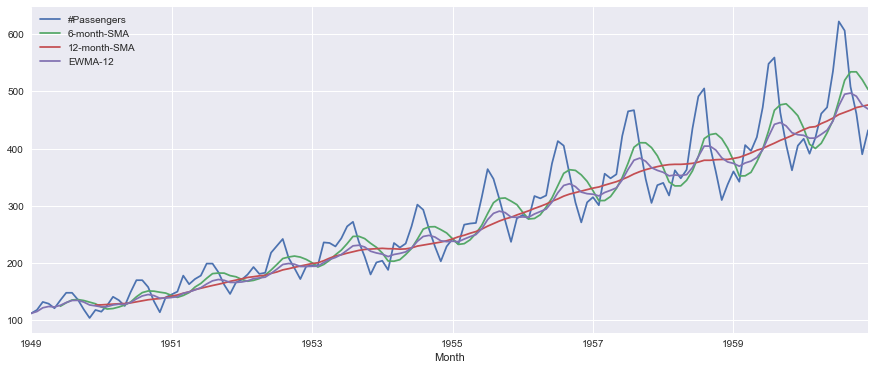

In [250]:
# Now plot the 6 & 12 month SMA with the original data
data.plot()

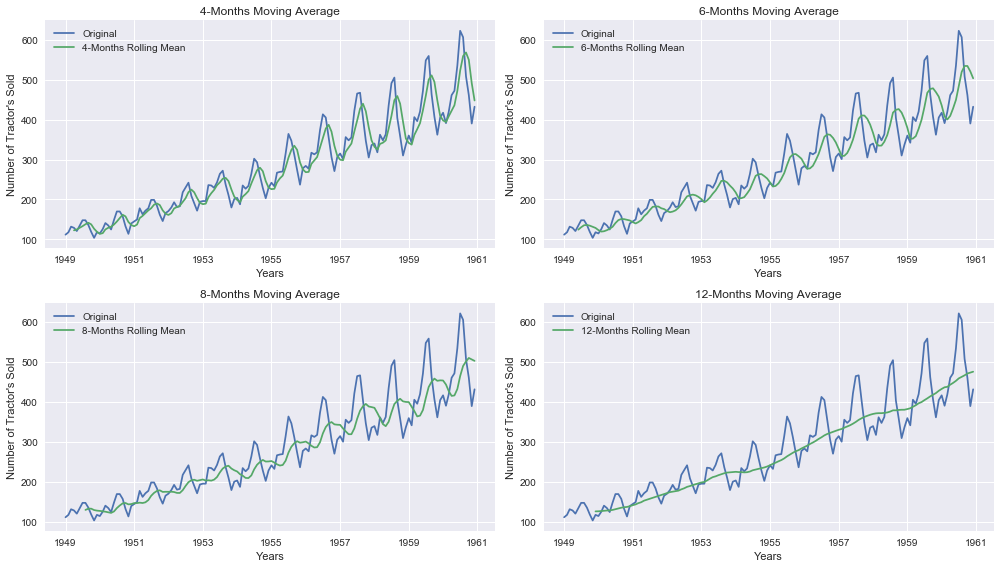

In [273]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(ts.index, ts, label='Original')
axes[0][0].plot(ts.index, ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(ts.index, ts, label='Original')
axes[0][1].plot(ts.index, ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(ts.index, ts, label='Original')
axes[1][0].plot(ts.index, ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(ts.index, ts, label='Original')
axes[1][1].plot(ts.index, ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

We can see that SMA has the following weaknesses:

* It will always lag by the size of the window.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Smaller windows will lead to more noise, rather than signal.

So, we use EWMA to fix some of these issues.

#### Exponential weighted moving average

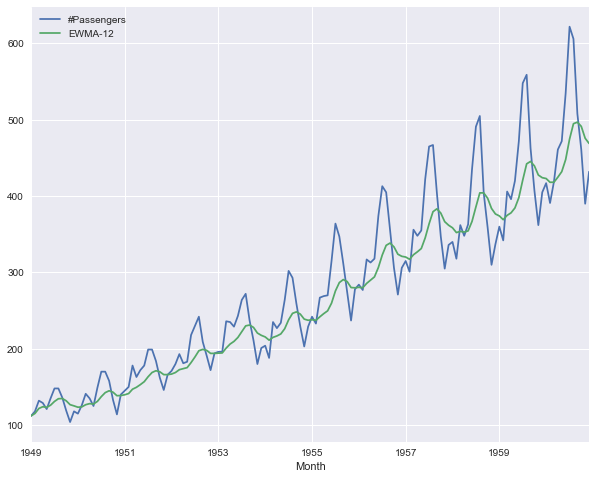

In [244]:
# Let's calculate EWMA with a span of 12 months and plot it with our series
data['EWMA-12'] = data['#Passengers'].ewm(span=12).mean()
data[['#Passengers', 'EWMA-12']].plot(figsize = (10,8))

We can clearly see that our series doesn't lag anymore. More weight has been put on the recent observations and the weight is gradually decreasing on observations going back.

#### Decomposition

In [245]:
# Let's try decomposing the series to see individual components of the series.
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['#Passengers'], model = 'multiplicative')

In [246]:
dir(result)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend']

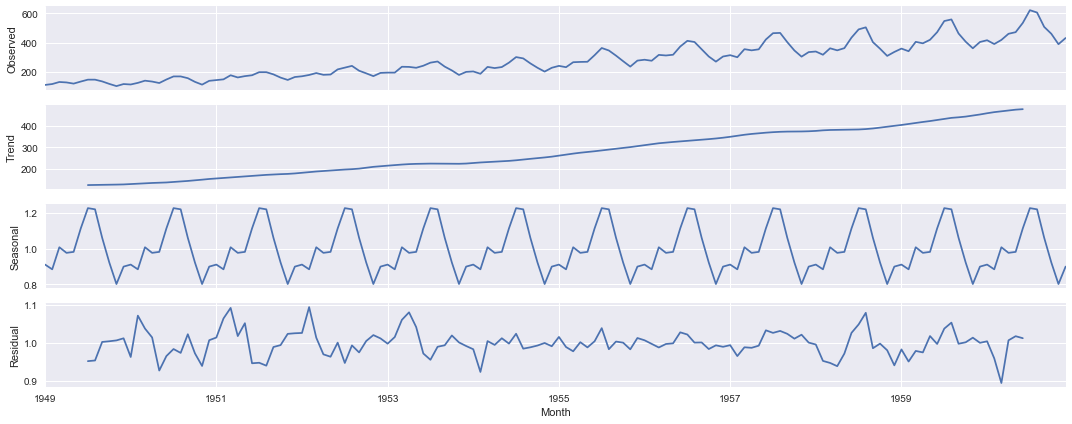

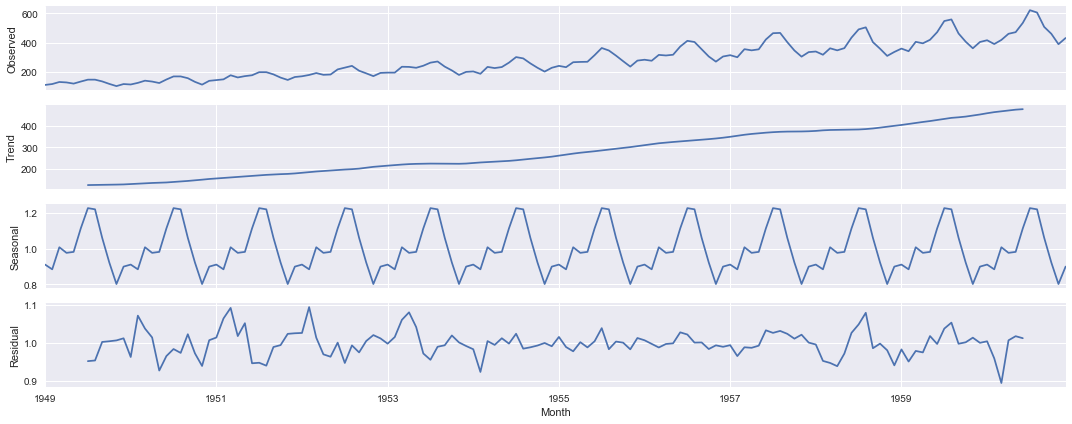

In [248]:
result.plot()

In [161]:
pd.DataFrame(result.trend)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.951664
1949-08-01,0.953401
1949-09-01,1.002220


In [162]:
pd.concat?

In [249]:
decompose_output = pd.DataFrame(pd.concat([pd.DataFrame(result.observed),pd.DataFrame(result.trend), pd.DataFrame(result.seasonal), pd.DataFrame(result.resid)],axis=1))
decompose_output.columns = list(['Actual', 'Trend', 'Seasonal', 'Resid'])
decompose_output

,Actual,Trend,Seasonal,Resid
Month,,,,
1949-01-01,112,NaN,0.910230,NaN
1949-02-01,118,NaN,0.883625,NaN
1949-03-01,132,NaN,1.007366,NaN
1949-04-01,129,NaN,0.975906,NaN
1949-05-01,121,NaN,0.981378,NaN
1949-06-01,135,NaN,1.112776,NaN
1949-07-01,148,126.791667,1.226556,0.951664
1949-08-01,148,127.250000,1.219911,0.953401
1949-09-01,136,127.958333,1.060492,1.002220


In [164]:
decompose_output.columns = list(['Actual', 'Trend', 'Seasonal', 'Resid'])
decompose_output.head(10)

,Actual,Trend,Seasonal,Resid
Month,,,,
1949-01-01,112,NaN,0.910230,NaN
1949-02-01,118,NaN,0.883625,NaN
1949-03-01,132,NaN,1.007366,NaN
1949-04-01,129,NaN,0.975906,NaN
1949-05-01,121,NaN,0.981378,NaN
1949-06-01,135,NaN,1.112776,NaN
1949-07-01,148,126.791667,1.226556,0.951664
1949-08-01,148,127.250000,1.219911,0.953401
1949-09-01,136,127.958333,1.060492,1.002220


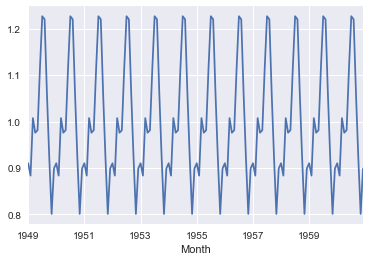

In [165]:
result.seasonal.plot()

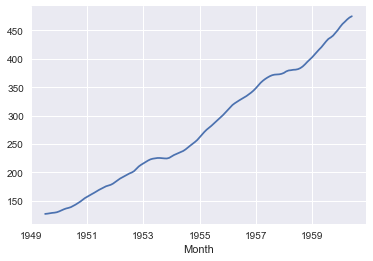

In [166]:
result.trend.plot()

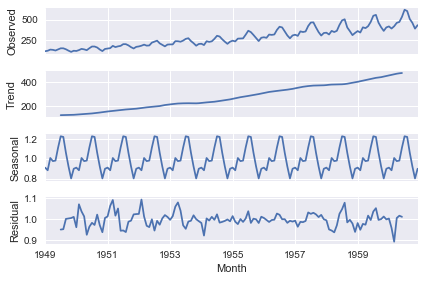

In [167]:
fig = result.plot() #if you just add.plot() to result it'll give dual plots

### Stationary Series

### How to Check Stationarity of a Time Series?

- A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

- Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

> constant mean <br>
> constant variance <br>
> an autocovariance that does not depend on time. <br>

- I’ll skip the details as it is very clearly defined in this article. Lets move onto the ways of testing stationarity. First and foremost is to simple plot the data and analyze visually. The data can be plotted using following command:



In [253]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    """
    Pass in a time series, returns ADF report
    """
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

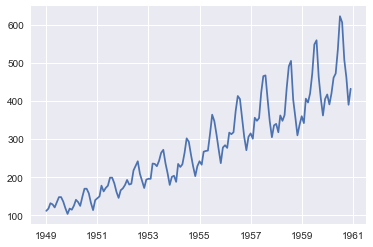

In [170]:
plt.plot(ts)

- It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences (we’ll see such cases later). So, more formally, we can check stationarity using the following:

- Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

> Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 

- These concepts might not sound very intuitive at this point. I recommend going through the prequel article. If you’re interested in some theoretical statistics, you can refer Introduction to Time Series and Forecasting by Brockwell and Davis. The book is a bit stats-heavy, but if you have the skill to read-between-lines, you can understand the concepts and tangentially touch the statistics.

- Back to checking stationarity, we’ll be using the rolling statistics plots along with Dickey-Fuller test results a lot so I have defined a function which takes a TS as input and generated them for us. Please note that I’ve plotted standard deviation instead of variance to keep the unit similar to mean.

#### We can use the Augmented Dickey-Fuller unit root test for this

In [171]:
from statsmodels.tsa.stattools import adfuller

In [172]:
result = adfuller(data['#Passengers'])

In [173]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.815368879206
p-value : 0.991880243438
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### Our adfuller test shows us that our data is a non-stationary time series. So we need to apply differencing before applying the Seasonal ARIMA model on our model

#### But before we do that; let's store the ADFuller test as a function so that we can have it for later use

In [174]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

### How to make a Time Series Stationary?
Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary. So statisticians have figured out ways to make series stationary, which we’ll discuss now. Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

Note: I’ll be discussing a number of methods. Some might work well in this case and others might not. But the idea is to get a hang of all the methods and not focus on just the problem at hand.

Let’s start by working on the trend part.

### Estimating & Eliminating Trend

One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

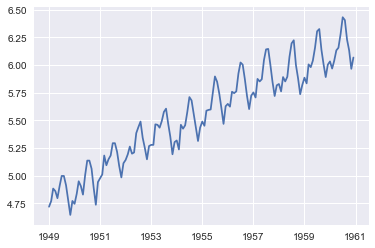

In [176]:
ts_log = np.log(ts)
plt.plot(ts_log)

n this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

Aggregation – taking average for a time period like monthly/weekly averages
Smoothing – taking rolling averages
Polynomial Fitting – fit a regression model
I will discuss smoothing here and you should try other techniques as well which might work out for other problems. Smoothing refers to taking rolling estimates, i.e. considering the past few instances. There are can be various ways but I will discuss two of those here.

Moving average

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


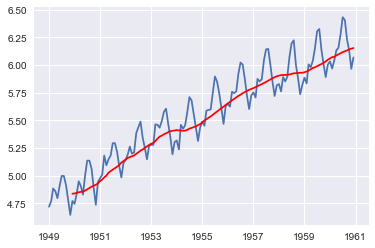

In [177]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:

In [252]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
1951-03-01    0.197694
1951-04-01    0.093955
1951-05-01    0.121101
1951-06-01    0.140570
                ...   
1958-07-01    0.276817
1958-08-01    0.298412
1958-09-01    0.075268
1958-10-01   -0.045657
1958-11-01   -0.193762
1958-12-01   -0.110499
1959-01-01   -0.049241
1959-02-01   -0.106598
1959-03-01    0.055385
1959-04-01    0.019679
1959-05-01    0.066365
1959-06-01    0.176286
1959-

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


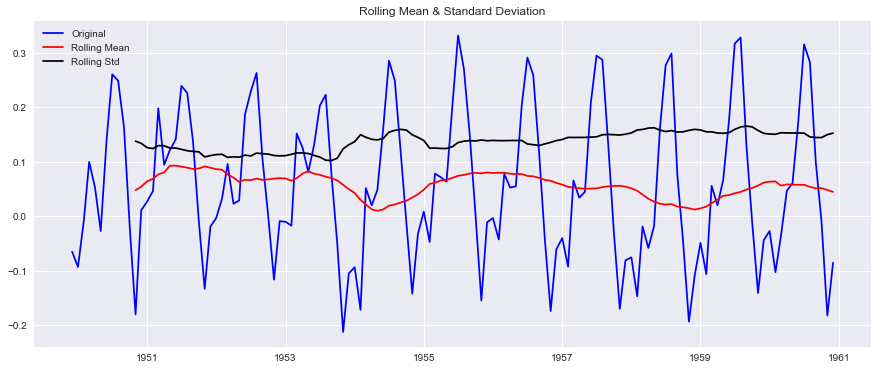

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (1%)             -3.486535
Critical Value (10%)            -2.579896
dtype: float64


In [254]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


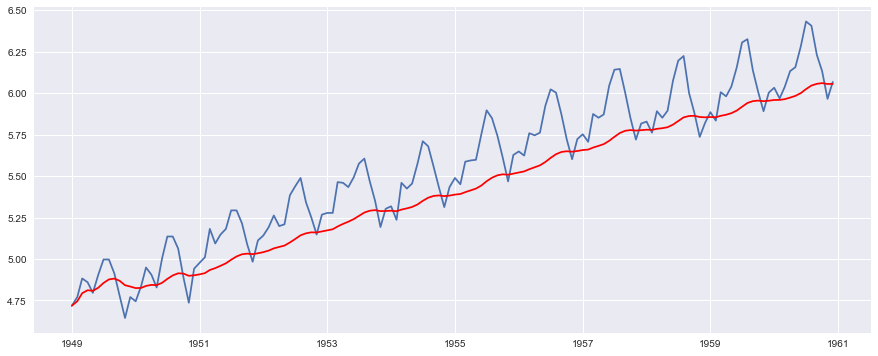

In [255]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


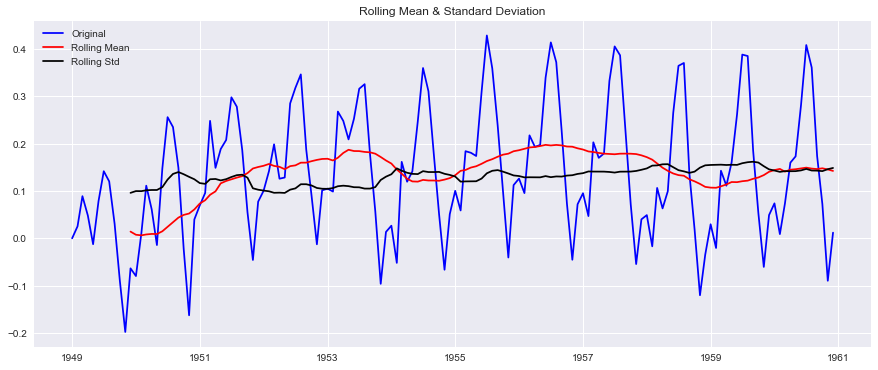

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [256]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

### Eliminating Trend and Seasonality

The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

- Differencing – taking the differece with a particular time lag
- Decomposition – modeling both trend and seasonality and removing them from the model.

Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:

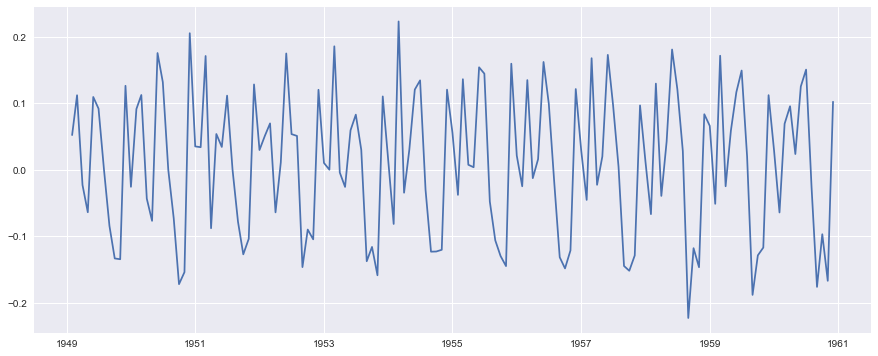

In [257]:
ts_log_diff = ts_log - ts_log.shift() #ts_log_diff = ts_log.diff(periods=1)
plt.plot(ts_log_diff)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


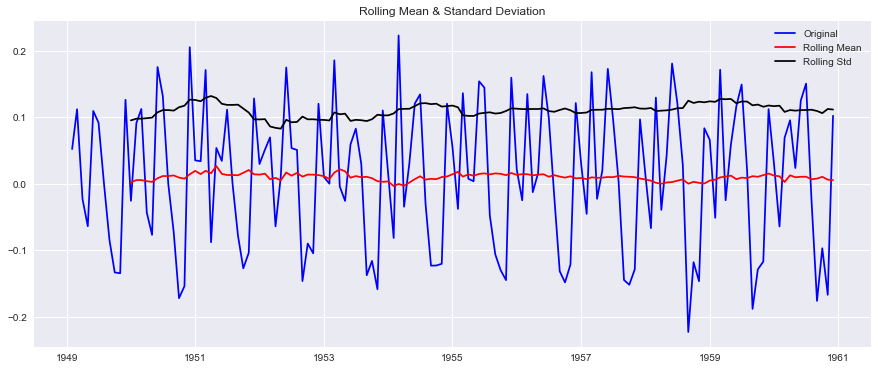

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
dtype: float64


In [258]:
# This appears to have reduced trend considerably. Lets verify using our plots:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

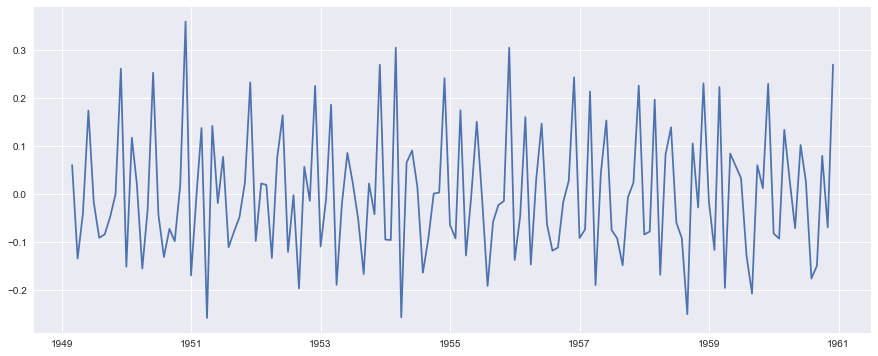

In [259]:
ts_log_diff2 = ts_log_diff - ts_log_diff.shift()
plt.plot(ts_log_diff2)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


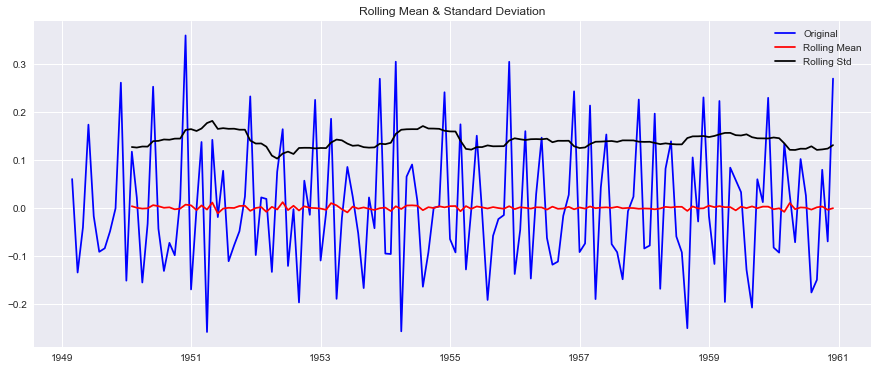

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (5%)           -2.884398e+00
Critical Value (1%)           -3.482501e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


In [260]:
ts_log_diff2.dropna(inplace=True)
test_stationarity(ts_log_diff2)

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications. I leave it to you to try them out.


#### Decomposing

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned. I’ll skip the statistics and come to the results:


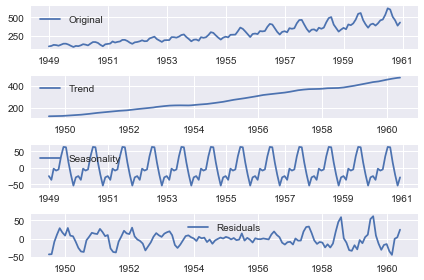

In [184]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

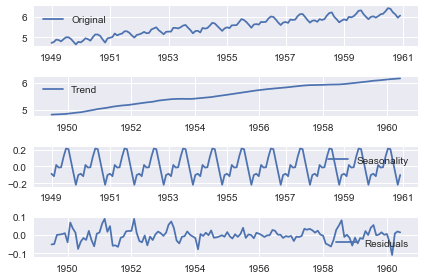

In [185]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. You can try advanced decomposition techniques as well which can generate better results. Also, you should note that converting the residuals into original values for future data in not very intuitive in this case.



### Method-2

### Let's apply differencing to our series to make it stationary. Since our dataset shows seasonality patterns we'll take the seasonal difference. 

#### However taking the first difference and second difference helps because we might use them for taking Seasonal first and Seasonal second difference for our series only if the Seasonal difference doesn't make our time series stationary.

In [186]:
data['First Difference'] = data['#Passengers'] - data['#Passengers'].shift()

In [187]:
adf_check(data['First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.82926682417
p-value : 0.0542132902838
#Lags Used : 12
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


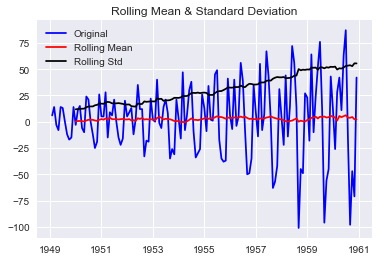

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [188]:
test_stationarity(data['First Difference'].dropna())

#### Our series is still not stationary so we need to take the second difference of the series.

In [189]:
data['Second Difference'] = data['First Difference'] - data['First Difference'].shift(1)

In [190]:
adf_check(data['Second Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -16.3842315425
p-value : 2.73289185001e-29
#Lags Used : 11
Number of Observations Used : 130
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


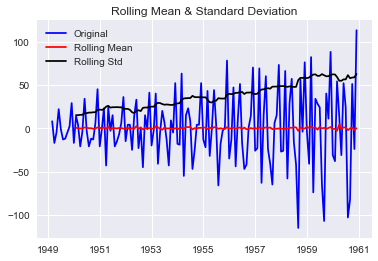

Results of Dickey-Fuller Test:
Test Statistic                -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (5%)           -2.884042e+00
Critical Value (1%)           -3.481682e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


In [191]:
test_stationarity(data['Second Difference'].dropna())

#### Now our data is stationary using the second difference. 

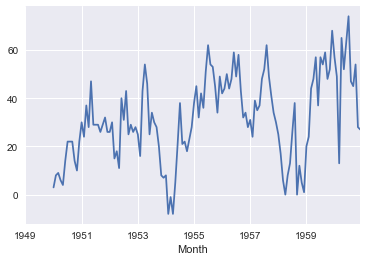

In [192]:
# Let's see a plot of the second difference
data['Seasonal Difference'] = data['#Passengers'] - data['#Passengers'].shift(12)
data['Seasonal Difference'].plot()

In [193]:
adf_check(data['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.38302072649
p-value : 0.0115514930855
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


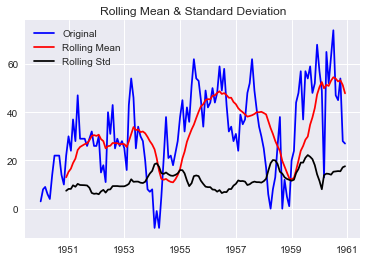

Results of Dickey-Fuller Test:
Test Statistic                  -3.383021
p-value                          0.011551
#Lags Used                       1.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [194]:
test_stationarity(data['Seasonal Difference'].dropna())

#### In this case; taking the seasonal difference made our time series stationary and so we don't need the first and second difference of the oringinal data.

### ETS MODELS

#### Simple Exponential smoothing 

In [168]:
alpha = 0.8
pred_1_1961_01 = np.sum([x*alpha*np.power((1-alpha),i) for (i,x) in enumerate(ts)])

print("The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.8 is: %f" % pred_1_1961_01)

alpha = 0.6
pred_2_1961_01 = np.sum([x*alpha*np.power((1-alpha),i) for (i,x) in enumerate(ts)])

print("The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.6 is: %f" % pred_2_1961_01)

alpha = 0.2
pred_3_1961_01 = np.sum([x*alpha*np.power((1-alpha),i) for (i,x) in enumerate(ts)])

print("The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.2 is: %f" % pred_3_1961_01)

The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.8 is: 113.728471
The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.6 is: 116.426560
The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.2 is: 125.494578


#### Holt-Winters Seasonal model

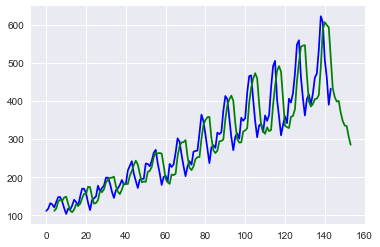

In [169]:
def holtwinters(series, alpha = 0.3, beta = 0.3, gamma = 0.3, seasonality = 4, type = "multiplicative", pred_steps = 10):
    
    # Initialisation
    level = [None]*len(series)
    trend = [None]*len(series)
    seasonal = [None]*len(series)
    forecast = [None]*(len(series) + pred_steps)
    
    for i in range(4):
        seasonal[i] = ( series[i]/np.mean(series[i:seasonality]) )
        
    level[seasonality-1] = np.mean(series[:seasonality])
    trend[seasonality-1] = 0
    
    # Holt-winters multiplicative steps
    for i in range(seasonality, len(series)):
        level[i] = alpha*(series[i]/seasonal[i-seasonality]) + (1-alpha)*(level[i-1] + trend[i-1])
        trend[i] = beta*(level[i] - level[i-1]) + (1-beta)*trend[i-1]
        seasonal[i] = gamma*(series[i]/(level[i-1] + trend[i-1])) + (1-gamma)*seasonal[i-seasonality]
        
        forecast[i] = (level[i-1] + trend[i-1])*seasonal[i-seasonality]
    
    # Make predictions
    last_index = len(series)-1
    for i in range(1,pred_steps+1):
        forecast[last_index+i] = (level[last_index] + i*trend[last_index])*seasonal[last_index-seasonality+((i-1)%seasonality)+1]
    
    return forecast


forecast = holtwinters(ts, alpha = 0.3, beta = 0.3, gamma = 0.3, seasonality = 4)

plt.plot(np.arange(144), ts, 'b-', np.arange(154), forecast, 'g-')
plt.show()

### TIME SERIES - MODELING

We saw different techniques and all of them worked reasonably well for making the TS stationary. Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.

A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.

Let me give you a brief introduction to ARIMA. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

> Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

> Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

> Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

> An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

The ACF and PACF plots for the TS after differencing can be plotted as:

In [261]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [262]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

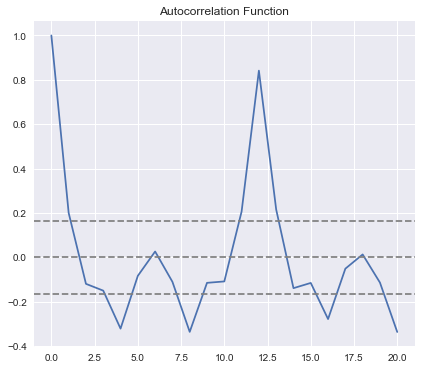

In [263]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

The sharp drop after lag 1 shows that we should use an AR Model. If there was a gradual decline we would have used an MA model.
We apply the Seasonal ARIMA model on our dataset because of the clear seasonal patterns in our dataset

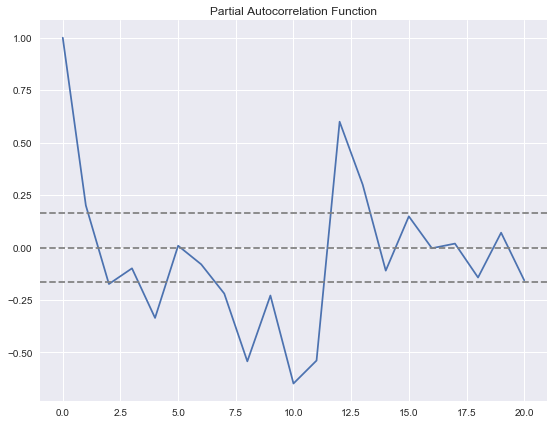

In [272]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

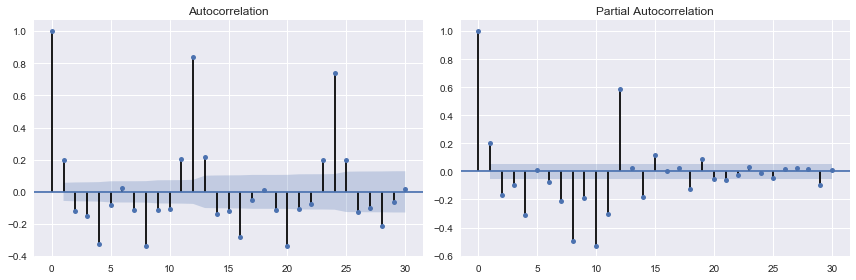

In [277]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

Since, there are enough spikes in the plots outside the insignificant zone (dotted horizontal lines) we can conclude that the residuals are not random. This implies that there is information available in residuals to be extracted by AR and MA models. Also, there is a seasonal component available in the residuals at the lag 12 (represented by spikes at lag 12). This makes sense since we are analyzing monthly data that tends to have seasonality of 12 months because of patterns airline passengers

### ARIMA MODELS

In [ ]:
# AR Model
#We need to load the ARIMA model first:
from statsmodels.tsa.arima_model import ARIMA

model1 = ARIMA(ts_log, order=(2, 2, 0))  #RSS=1.5 #AR Model
model2 = ARIMA(ts_log, order=(0, 2, 2))  #RSS=1.4 #MA Model
model = ARIMA(ts_log, order=(2, 2, 1))  #RSS=1 #ARMA Model
results_AR = model1.fit(disp=-1)  
results_MA= model2.fit(disp=-1)  
results_ARMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [267]:
print(results_ARMA.summary())

                             ARIMA Model Results                              
Dep. Variable:         D2.#Passengers   No. Observations:                  142
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 119.086
Method:                       css-mle   S.D. of innovations              0.103
Date:                Sat, 18 Nov 2017   AIC                           -228.173
Time:                        16:01:16   BIC                           -213.394
Sample:                    03-01-1949   HQIC                          -222.167
                         - 12-01-1960                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.261e-05      0.000     -0.322      0.748      -0.001       0.000
ar.L1.D2.#Passengers     0.2413      0.083      2.901      0.004       0.078       0.404
ar.L2.D2.#Pa

In [268]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:         D2.#Passengers   No. Observations:                  142
Model:                 ARIMA(2, 2, 0)   Log Likelihood                  96.377
Method:                       css-mle   S.D. of innovations              0.123
Date:                Sat, 18 Nov 2017   AIC                           -184.754
Time:                        16:01:18   BIC                           -172.931
Sample:                    03-01-1949   HQIC                          -179.949
                         - 12-01-1960                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0003      0.006     -0.055      0.956      -0.012       0.012
ar.L1.D2.#Passengers    -0.3871      0.081     -4.779      0.000      -0.546      -0.228
ar.L2.D2.#Pa

In [269]:
print(results_.summary())

                             ARIMA Model Results                              
Dep. Variable:         D2.#Passengers   No. Observations:                  142
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 118.206
Method:                       css-mle   S.D. of innovations              0.104
Date:                Sat, 18 Nov 2017   AIC                           -228.412
Time:                        16:01:19   BIC                           -216.588
Sample:                    03-01-1949   HQIC                          -223.607
                         - 12-01-1960                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.703e-05      0.000     -0.289      0.773      -0.001       0.000
ma.L1.D2.#Passengers    -0.7220      0.096     -7.492      0.000      -0.911      -0.533
ma.L2.D2.#Pa

In [201]:
results_AR.forecast?

In [270]:
forecast_4months=results_ARMA.forecast(steps=4)

In [271]:
np.exp(forecast_4months[0])

array([ 456.85065318,  456.66893006,  453.79937333,  454.53764251])

In [204]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [205]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [206]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773240
1949-05-01    4.768720
dtype: float64

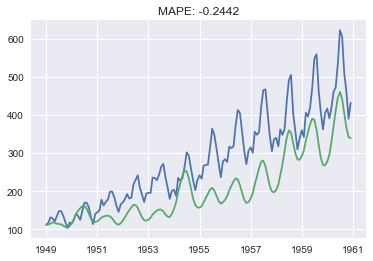

In [207]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.title('MAPE: %.4f'% np.mean((predictions_ARIMA-ts)/ts))

Here we can see that the AR and MA models have almost the same RSS but combined is significantly better. Now, we are left with 1 last step, i.e. taking these values back to the original scale.

Taking it back to original scale

Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.

## SEASONAL ARIMA MODEL (SARIMA)

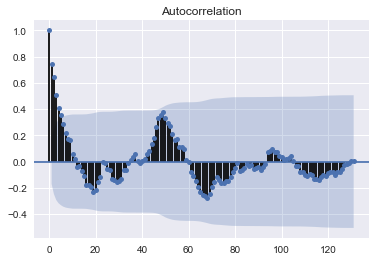

In [216]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# ACF plot of the Seasonal Difference.
fig_seasonal_acf = plot_acf(data["Seasonal Difference"].dropna())

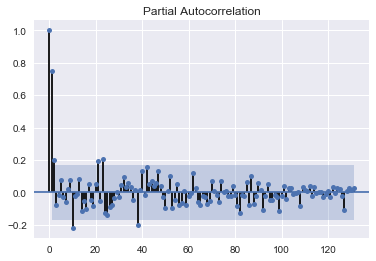

In [217]:
# PACF plot of the Seasonal Difference.
fig_seasonal_pacf = plot_pacf(data["Seasonal Difference"].dropna())

# In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.

- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

Now, lets make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.




In [218]:
model = sm.tsa.statespace.SARIMAX(data['#Passengers'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -513.064
Date:                            Sat, 18 Nov 2017   AIC                           1032.128
Time:                                    13:58:13   BIC                           1041.037
Sample:                                01-01-1949   HQIC                          1035.748
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4437      0.527     -0.842      0.400      -1.477       0.589
ma.S.L12       0.2738      0.572   

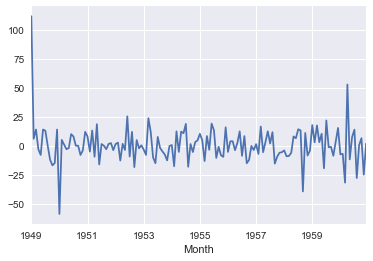

In [219]:
results.resid.plot()

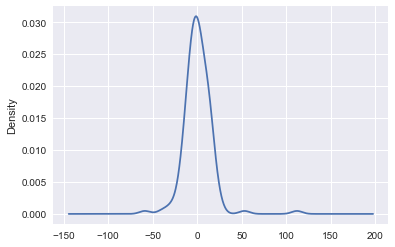

In [220]:
results.resid.plot(kind='kde')

#### Prediction of Future Values
Firts we can get an idea of how well our model performs by just predicting for values that we actually already know:
    

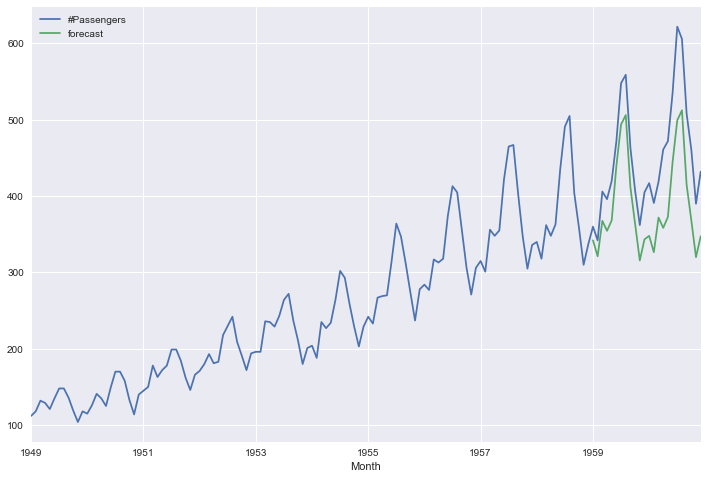

In [221]:
data['forecast'] = results.predict(start = 120, end= 144, dynamic= True)  
data[['#Passengers','forecast']].plot(figsize=(12,8))

#### Forecasting
This requires more time periods, so let's create them with pandas onto our original dataframe!

In [288]:
data.tail()

,#Passengers,6-month-SMA,12-month-SMA,EWMA-12
Month,,,,
1960-08-01,606,519.166667,463.333333,494.898620
1960-09-01,508,534.000000,467.083333,496.914217
1960-10-01,461,534.000000,471.583333,491.388952
1960-11-01,390,520.333333,473.916667,475.790652
1960-12-01,432,503.166667,476.166667,469.053629


In [289]:
from pandas.tseries.offsets import DateOffset

In [290]:
future_dates = [data.index[-1] + DateOffset(months=x) for x in range(0,24) ]

In [291]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [292]:
future_df = pd.concat([data,future_dates_df])

In [293]:
future_df.head()

,#Passengers,6-month-SMA,12-month-SMA,EWMA-12
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,115.250000
1949-03-01,132,NaN,NaN,121.787529
1949-04-01,129,NaN,NaN,124.064224
1949-05-01,121,NaN,NaN,123.231685


In [294]:
future_df.tail(15)

,#Passengers,6-month-SMA,12-month-SMA,EWMA-12
1961-09-01,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN
1961-11-01,NaN,NaN,NaN,NaN
1961-12-01,NaN,NaN,NaN,NaN
1962-01-01,NaN,NaN,NaN,NaN
1962-02-01,NaN,NaN,NaN,NaN
1962-03-01,NaN,NaN,NaN,NaN
1962-04-01,NaN,NaN,NaN,NaN
1962-05-01,NaN,NaN,NaN,NaN
1962-06-01,NaN,NaN,NaN,NaN


### AUTOMATION OF IDENTIFYING BEST ARIMA MODEL

##### Identification of best fit ARIMA model

In order to fit the time series data with a seasonal ARIMA model, we need to first find the the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest such as AIC or BIC. There are many guidelines and best practices to achieve this goal, yet the correct parametrization of ARIMA models can be a painstaking manual process that requires domain expertise and time. Auto arima function in forecast package in R helps us identify the best fit ARIMA model on the fly but in Python we will generate combination of p,d and q to select the optimal parameter values for our ARIMA(p,d,q)(P,D,Q)s time series model.
This technique is known as "grid search" where we iteratively explore different combinations of parameters. For each such combination of parameters, we try to fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess AIC or BIC score. The model with the best score wins and the parmeters for that model are the optimal parmeters.

In [279]:
import warnings
import itertools

In [280]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [282]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-499.316126669


Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-499.316126669

The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.

#### Akaike Information Criterion (AIC) 
- AIC is an effort to balance the model between goodness-of-fit and number of parameters used in the model. This is similar to the balancing act between income and cost of a company so that the debs of the company is optimized (Debt = Cost - Income). As a modeler, we care about the maximum goodness of fit (income) with the minimum number of parameters (cost).

AIC=2K−2ln(L)

For the given model, L in the above formula is the maximized value of the likelihood function representing goodness-of-fit, and K the number of estimated parameters. Like our debts, we want to keep AIC value at the minimum to choose the best possible model. Bayesian Information Criterion (BIC) is another variant of AIC and is used for the same purpose of best fit model selection. For the best possible model selection, we want to look at AIC, BIC, and AICc (AIC with sample correction) if all these values are minimum for a given model. With increasing parameters K will increase and hence AIC increases. While with the goodness of the fit L increases thus decreasing AIC.

As expected, our model has I (or integrated) component equal to 1. This represents differencing of order 1. There is additional differencing of lag 12 in the above best fit model. Moreover, the best fit model has MA value of order 1. Also, there is seasonal MA with lag 12 of order 1.

The model that we got here is different from the one that was discussed in the blog. Let us validate that model with ours how does that perform with statsmodel as well as our model.

In [284]:
# comparing our model with the best model reported in the blog
param_order = (0, 1, 1)
param_seasonal_order = (1, 0, 1, 12)
model = sm.tsa.statespace.SARIMAX(ts_log,
                                      order=param_order,
                                      seasonal_order=param_seasonal_order,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
results = model.fit()
print("SARIMAX{}x{}12 model - AIC:{}".format(param_order, param_seasonal_order, results.aic))

SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-499.316126669


In [286]:
print(results.summary().tables[0])
print(results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 253.658
Date:                            Sat, 18 Nov 2017   AIC                           -499.316
Time:                                    22:21:20   BIC                           -487.437
Sample:                                01-01-1949   HQIC                          -494.489
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3555      0.070     -5.070      0.000      -0.493      -0.218
ar.S.L12       0.9901      0.007   

In [297]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1957-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [298]:
# Extract the predicted and true values of our time series
ts_forecasted = pred_dynamic.predicted_mean
ts_truth = ts_log['1957-01-01':]

# Compute the mean square error
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is 0.008


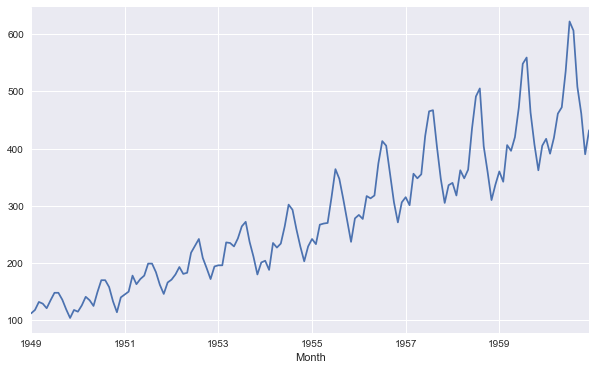

In [301]:
axis = ts['1949':].plot(label='Observed', figsize=(10, 6))
axis

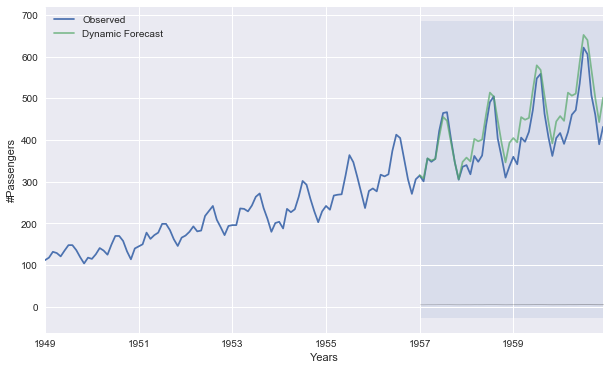

In [305]:
axis = ts['1949':].plot(label='Observed', figsize=(10, 6))
np.exp(pred_dynamic.predicted_mean).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('1957-01-01'), ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('#Passengers')
plt.legend(loc='best')
plt.show()
plt.close()

#### Forecast sales using the best fit ARIMA model
The next step is to predict tractor sales for next 3 years i.e. for 1961, 1962, and 1963 through the above model.



In [306]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [307]:
n_steps = 36
idx = pd.date_range(ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.exp(pred_uc_95.predicted_mean), np.exp(pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.exp(pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1960-12-01,449.476614,418.321787,482.951721,418.321787,482.951721
1961-01-01,425.338108,390.499579,463.284765,390.499579,463.284765
1961-02-01,477.262622,433.060014,525.977007,433.060014,525.977007
1961-03-01,490.394745,440.344900,546.133283,440.344900,546.133283
1961-04-01,506.610623,450.590447,569.595570,450.590447,569.595570


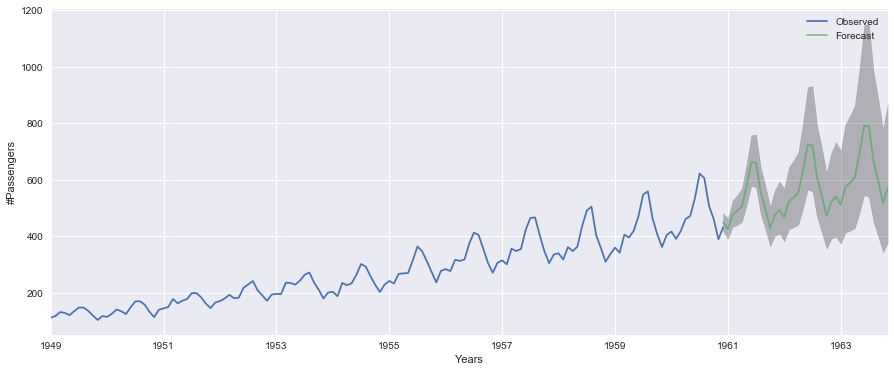

In [308]:
# plot the forecast along with the confidence band
axis = ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('#Passengers')
plt.legend(loc='best')
plt.show()

Now, forecasts for a long period of 3 years is an ambitious task. The major assumption here is that the underlining patterns in the time series will continue to stay the same as predicted in the model. A short-term forecasting model, say a couple of business quarters or a year, is usually a good idea to forecast with reasonable accuracy. A long-term model like the one above needs to evaluated on a regular interval of time (say 6 months). The idea is to incorporate the new information available with the passage of time in the model.

### Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction
Finally, let’s create an ACF and PACF plot of the residuals of our best fit ARIMA model i.e. ARIMA(0,1,1)(1,0,1)[12].

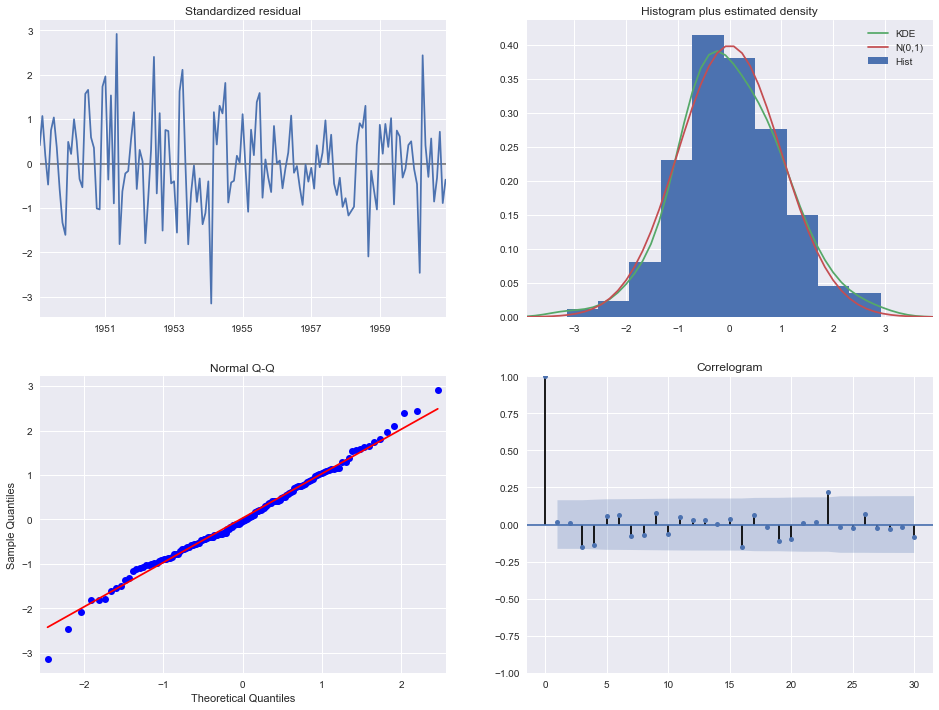

In [309]:
results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If it is not that it signifies that the model can be further improved and we repeat the process with the residuals.
In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:
- The KDE plot of the residuals on the top right is almost similar with the normal distribution.
- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
- The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations coupled with the fact that there are no spikes outside the insignificant zone for both ACF and PACF plots lead us to conclude that that residuals are random with no information or juice in them and our model produces a satisfactory fit that could help us understand our time series data and forecast future values. It sems that our ARIMA model is working fine.

### FUNCTION FOR AUTO ARIMA MODEL

In [310]:
import sys

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 1), q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None

    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=True,
                                                 enforce_invertibility=True)
                temp_results = temp_model.fit()

                # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
                
                

    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [ ]:
#ARIMA Model No Regressor
#timeseries = data['#Passengers']
timeseries = ts_log
#regressors = lagged_mkt_exp_diff_sales_data["Diff_Mkt_Exp"][3:47]
auto_arima(timeseries, p=range(0, 2), d=range(0, 2), q=range(0, 2))